In [49]:
# AI Spam classifier
import pandas as pd
import matplotlib.pyplot as plt

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [50]:
# Load the data
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [52]:
# Drop nan rows
df.dropna(inplace=True)

In [53]:
# show amount of spam and ham in numbers
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [54]:
# Create a pipeline to vectorize the data and train a classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

In [55]:
# split data to make sure there is at least 80% of data for training
spamLen = len(df[df['Category'] == "spam"])
hamLen = len(df[df['Category'] == "ham"])

x_train = pd.concat(
    [df[df['Category'] == "spam"][:round(spamLen * 0.8)],
     df[df['Category'] == "ham"][:round(hamLen * 0.8)]]
)

x_test = pd.concat(
    [df[df['Category'] == "spam"][round(spamLen * 0.8):],
     df[df['Category'] == "ham"][round(hamLen * 0.8):]]
)

In [56]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4458 entries, 2 to 4462
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  4458 non-null   object
 1   Message   4458 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


In [57]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1114 entries, 4407 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  1114 non-null   object
 1   Message   1114 non-null   object
dtypes: object(2)
memory usage: 26.1+ KB


In [58]:
# assert that the data is split correctly
assert len(x_train) + len(x_test) == len(df)

# assert is index is unique and there no duplicates between train and test
assert x_train.index.is_unique
assert x_test.index.is_unique
assert len(x_train.index.intersection(x_test.index)) == 0

In [59]:
x_train, y_train, x_test, y_test = x_train['Message'], x_train['Category'], x_test['Message'], x_test['Category']

In [60]:
# Train the classifier
text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [61]:
# Test the model
assert text_clf.predict(["Hey, how are you?"]) == ['ham']
assert text_clf.predict(["You are the winner of big price! Click link bellow"]) == ['spam']

In [62]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report

predictions = text_clf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[962   3]
 [ 11 138]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.98      0.93      0.95       149

    accuracy                           0.99      1114
   macro avg       0.98      0.96      0.97      1114
weighted avg       0.99      0.99      0.99      1114



In [63]:
# Classificator score
from sklearn.metrics import accuracy_score

print(accuracy := accuracy_score(y_test, predictions))

0.9874326750448833


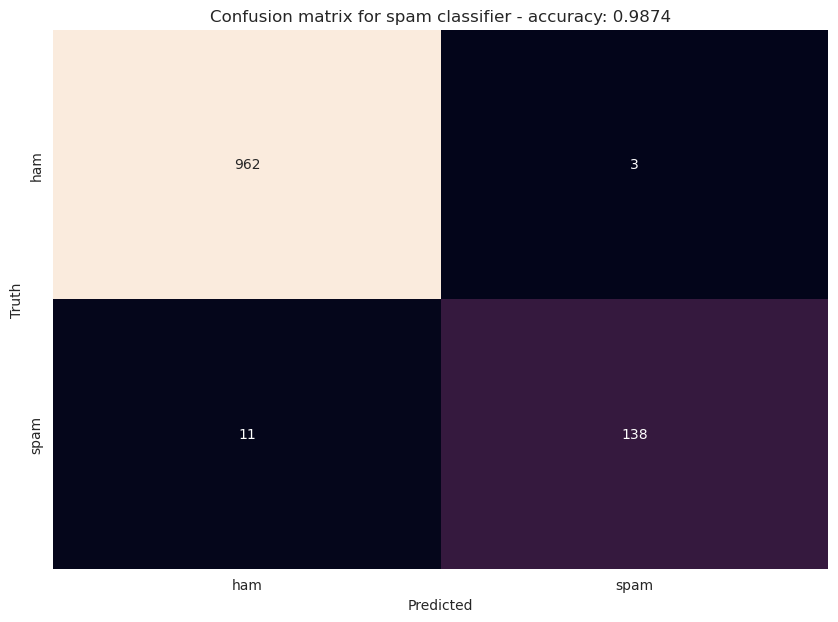

In [64]:
# Present data as confusion matrix
import seaborn as sns

confusion = confusion_matrix(y_test, predictions, labels=['ham', 'spam'])
# display numbers in nonscientific notation
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='g', cbar=False, xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title(f'Confusion matrix for spam classifier - accuracy: {accuracy:.4f}')
plt.show()